In [1]:
# Titanic Survival Analysis
# Autor: Konrad Gromala
# Opis: Klasyfikacja przeżycia pasażerów Titanica na podstawie danych demograficznych i podróżniczych

# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Wczytanie danych
data = pd.read_csv('titanic.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Informacje ogólne o danych
data.info()

# Statystyki opisowe
data.describe()

# Liczba brakujących wartości
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Uzupełnianie brakujących wartości

# Age: średnia
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Embarked: najczęstsza wartość
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Usuwanie kolumn nieprzydatnych
columns_to_drop = ['Cabin', 'Name', 'Ticket', 'PassengerId']
data.drop(columns=columns_to_drop, axis=1, inplace=True)


C:\Users\kgrom_djzlmpz\AppData\Local\Temp\ipykernel_9356\1249689617.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\kgrom_djzlmpz\AppData\Local\Temp\ipykernel_9356\1249689617.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [4]:
# Funkcja pomocnicza
def create_features(df):
    df['IsAlone'] = (df['SibSp'] + df['Parch'] == 0).astype(int)
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                            labels=['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior'])
    return df

# Tworzenie nowych cech
data = create_features(data)


In [5]:
# Label Encoding dla kolumny 'Sex'
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

# One-Hot Encoding dla kolumn 'Embarked' i 'AgeGroup'
data = pd.get_dummies(data, columns=['Embarked', 'AgeGroup'], drop_first=True)


In [6]:
# Cecha (X) i zmienna docelowa (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Funkcja do tworzenia i oceny modeli
def build_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Macierz konfuzji
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Model: Logistic Regression
Accuracy: 0.8044692737430168
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



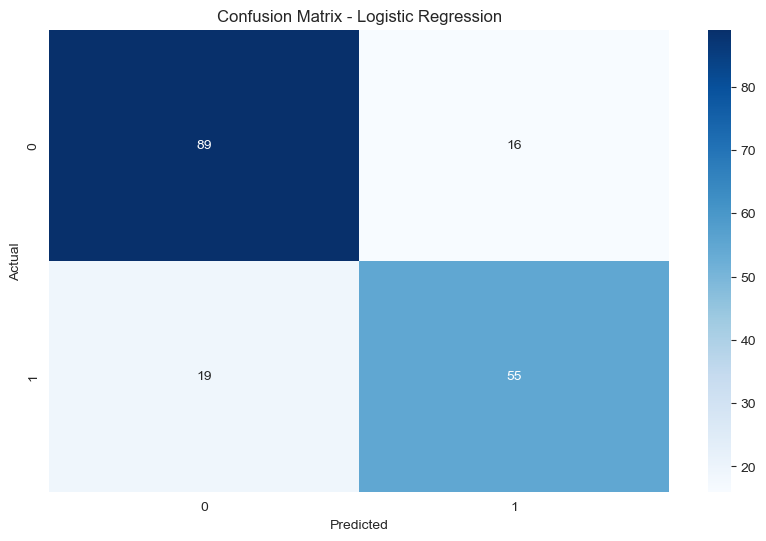

In [8]:
# Regresja logistyczna
logreg = LogisticRegression(max_iter=1000, random_state=42)
build_and_evaluate(logreg, "Logistic Regression")


Model: Random Forest
Accuracy: 0.8268156424581006
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



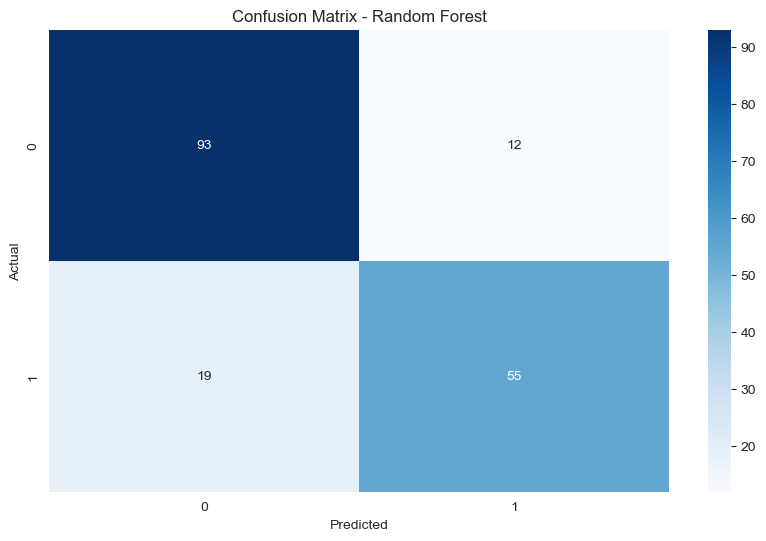

In [9]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
build_and_evaluate(rf, "Random Forest")
